In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Tidying and Cleaning
### Preparing data for knowledge extraction

#### *Be carefull with extrapolation*
<img src="https://pbs.twimg.com/media/EnIyWFZXMAMEUxs.jpg:large" alt="Alternative text" width="500"/>



#### *Be carefull with spurious correlations*
<img src="https://www.tylervigen.com/chart-pngs/3.png" alt="Alternative text" width="800"/>

#### *As the number of columns increases, the probability of finding significant correlations increases. Remember that!*

## Table of Contents
* Messy and tidy data
    * Tidying up messy data

* Operations on datasets

* Cleaning data
    * Validation
    * Transformation
    * Error correction
    * Features
    
* Data tidying and cleaning as a process

## 1. Data Tidying

### Tidy data
* Tidy Data
Most important rules when creating (or using) datasets
    * Columns - attributes (features, variables)
    * Rows - observations
    * Cells - values (one observation of one feature)
    * All other data is called **messy data**


* Empirical rule for testing whether a dataset is tidy
    * Adding one more observation should create one new row
        - No new columns
        - No multiple rows
        - No partial rows, no changes to other rows


* **pandas** allows us to read, tidy up and transform datasets
    * Data modelling requires a tidy and clean dataset in order to work well 
    - (garbage in garbage out)
    

### Messy Data
* What we want
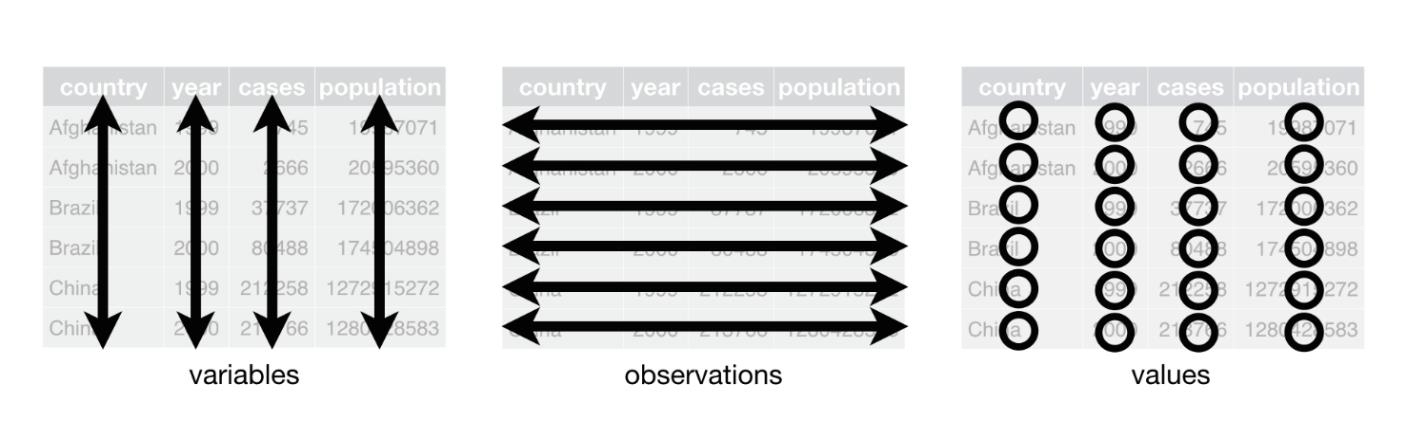

* What we go instead
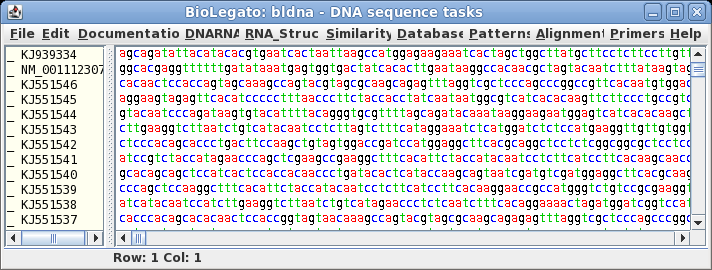



### Tidy and Messy Data
* A very good [paper](http://vita.had.co.nz/papers/tidy-data.pdf) on tidy data
* Example: several datasets
    * Same information, different ease of use
<img src="https://raw.githubusercontent.com/mstoychev/Data-Science/main/data/tidy%20data.png" alt="Alternative text" />



### Messy to Tidy Data
*  The table header contains values
    - Identify the variables and distribute (unpivot) the values

* Read the **pew.csv** dataset
    - Distribution of income by religion
    
* Show the first 5 values (use thehead() function)
    - Also see the number of variables and observations (shape)
    - This will also ensure that you've read the dataset correctly
    - Variables: religion, income, frequency

In [3]:
pew = pd.read_csv("data/pew.csv")

In [4]:
pew.head()

religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k  $50-75k  \
0            Agnostic     27       34       60       81       76      137   
1             Atheist     12       27       37       52       35       70   
2            Buddhist     27       21       30       34       33       58   
3            Catholic    418      617      732      670      638     1116   
4  Don’t know/refused     15       14       15       11       10       35   

   $75-100k  $100-150k  >150k  Don't know/refused  
0       122        109     84                  96  
1        73         59     74                  76  
2        62         39     53                  54  
3       949        792    633                1489  
4        21         17     18                 116

In [5]:
pew.shape

(18, 11)

This is pivot table, so it´s not a tidy data. 
The first column religion is a string and  the rest are integers.

For example, if I repeat the study and Catholic between 10-20K now are 700 instead of 617, I should edit the row. This is not a good practice. So we have to fix this. (with *df.melt()*)


In [6]:
pew_tidy = pew.melt(id_vars = "religion")

In [7]:
pew_tidy

religion            variable  value
0                   Agnostic               <$10k     27
1                    Atheist               <$10k     12
2                   Buddhist               <$10k     27
3                   Catholic               <$10k    418
4         Don’t know/refused               <$10k     15
5           Evangelical Prot               <$10k    575
6                      Hindu               <$10k      1
7    Historically Black Prot               <$10k    228
8          Jehovah's Witness               <$10k     20
9                     Jewish               <$10k     19
10             Mainline Prot               <$10k    289
11                    Mormon               <$10k     29
12                    Muslim               <$10k      6
13                  Orthodox               <$10k     13
14           Other Christian               <$10k      9
15              Other Faiths               <$10k     20
16     Other World Religions               <$10k      5
17              Unaffiliated               <$10k    217
18                  Agnostic             $10-20k     34
19                   Atheist             $10-20k     27
20                  Buddhist             $10-20k     21
21                  Catholic             $10-20k    617
22        Don’t know/refused             $10-20k     14
23          Evangelical Prot             $10-20k    869
24                     Hindu             $10-20k      9
25   Historically Black Prot             $10-20k    244
26         Jehovah's Witness             $10-20k     27
27                    Jewish             $10-20k     19
28             Mainline Prot             $10-20k    495
29                    Mormon             $10-20k     40
..                       ...                 ...    ...
150                    Hindu               >150k     54
151  Historically Black Prot               >150k     78
152        Jehovah's Witness               >150k      6
153                   Jewish               >150k    151
154            Mainline Prot               >150k    634
155                   Mormon               >150k     42
156                   Muslim               >150k      6
157                 Orthodox               >150k     46
158          Other Christian               >150k     12
159             Other Faiths               >150k     41
160    Other World Religions               >150k      4
161             Unaffiliated               >150k    258
162                 Agnostic  Don't know/refused     96
163                  Atheist  Don't know/refused     76
164                 Buddhist  Don't know/refused     54
165                 Catholic  Don't know/refused   1489
166       Don’t know/refused  Don't know/refused    116
167         Evangelical Prot  Don't know/refused   1529
168                    Hindu  Don't know/refused     37
169  Historically Black Prot  Don't know/refused    339
170        Jehovah's Witness  Don't know/refused     37
171                   Jewish  Don't know/refused    162
172            Mainline Prot  Don't know/refused   1328
173                   Mormon  Don't know/refused     69
174                   Muslim  Don't know/refused     22
175                 Orthodox  Don't know/refused     73
176          Other Christian  Don't know/refused     18
177             Other Faiths  Don't know/refused     71
178    Other World Religions  Don't know/refused      8
179             Unaffiliated  Don't know/refused    597

[180 rows x 3 columns]

In [8]:
#That works but I want to have three variables: religion, income, frequency. So let´s change the name.
pew_tidy = pew.melt(id_vars = "religion", var_name = "income", value_name = "frequency")

In [9]:
pew_tidy.head()

religion income  frequency
0            Agnostic  <$10k         27
1             Atheist  <$10k         12
2            Buddhist  <$10k         27
3            Catholic  <$10k        418
4  Don’t know/refused  <$10k         15

### Messy to Tidy Data (2)
*  Multiple variables stored in one column
    - Identify and split the variables into separate columns

* Read the **tb.csv** dataset
    - Tuberculosis cases
    - m04 , m514 , m1524 , etc. contain two variables (gender and age)
        - male, 0-4 years old; male, 5-14 years old, etc.
        - There's also a problem with missing values (NaN)
    
* Tidying process
    - First, melt all columns (they are values and should not be)
    - Next, split the column names and extract the gender and age information
    - Add the new info to the dataset
    - Remove all missing values

In [10]:
tb = pd.read_csv("data/tb.csv")

In [11]:
tb

iso2  year  m04   m514   m014   m1524   m2534   m3544   m4554  m5564  \
0      AD  1989  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
1      AD  1990  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
2      AD  1991  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
3      AD  1992  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
4      AD  1993  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5      AD  1994  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
6      AD  1996  NaN    NaN    0.0     0.0     0.0     4.0     1.0    0.0   
7      AD  1997  NaN    NaN    0.0     0.0     1.0     2.0     2.0    1.0   
8      AD  1998  NaN    NaN    0.0     0.0     0.0     1.0     0.0    0.0   
9      AD  1999  NaN    NaN    0.0     0.0     0.0     1.0     1.0    0.0   
10     AD  2000  NaN    NaN    0.0     0.0     1.0     0.0     0.0    0.0   
11     AD  2001  NaN    NaN    0.0     NaN     NaN     2.0     1.0    NaN   
12     AD  2002  NaN    NaN    0.0     0.0     0.0     1.0     0.0    0.0   
13     AD  2003  NaN    NaN    0.0     0.0     0.0     1.0     2.0    0.0   
14     AD  2004  NaN    NaN    0.0     0.0     0.0     1.0     1.0    0.0   
15     AD  2005  0.0    0.0    0.0     0.0     1.0     1.0     0.0    0.0   
16     AD  2006  0.0    0.0    0.0     1.0     1.0     2.0     0.0    1.0   
17     AD  2007  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
18     AD  2008  0.0    0.0    0.0     0.0     0.0     0.0     1.0    0.0   
19     AE  1980  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
20     AE  1981  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
21     AE  1982  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
22     AE  1983  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
23     AE  1984  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
24     AE  1985  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
25     AE  1986  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
26     AE  1987  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
27     AE  1988  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
28     AE  1989  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
29     AE  1990  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
...   ...   ...  ...    ...    ...     ...     ...     ...     ...    ...   
5739   ZM  2008  NaN    NaN  101.0  1120.0  3244.0  2094.0   737.0  299.0   
5740   ZW  1980  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5741   ZW  1981  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5742   ZW  1982  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5743   ZW  1983  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5744   ZW  1984  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5745   ZW  1985  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5746   ZW  1986  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5747   ZW  1987  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5748   ZW  1988  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5749   ZW  1989  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5750   ZW  1990  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5751   ZW  1991  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5752   ZW  1992  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5753   ZW  1993  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5754   ZW  1994  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5755   ZW  1995  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5756   ZW  1996  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5757   ZW  1997  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5758   ZW  1998  NaN    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
5

In [12]:
tb[tb.iso2.isna()]

iso2  year  m04  m514  m014  m1524   m2534  m3544  m4554  m5564 ...   \
3691  NaN  1985  NaN   NaN   NaN    NaN     NaN    NaN    NaN    NaN ...    
3692  NaN  1986  NaN   NaN   NaN    NaN     NaN    NaN    NaN    NaN ...    
3693  NaN  1987  NaN   NaN   NaN    NaN     NaN    NaN    NaN    NaN ...    
3694  NaN  1988  NaN   NaN   NaN    NaN     NaN    NaN    NaN    NaN ...    
3695  NaN  1989  NaN   NaN   NaN    NaN     NaN    NaN    NaN    NaN ...    
3696  NaN  1990  NaN   NaN   NaN    NaN     NaN    NaN    NaN    NaN ...    
3697  NaN  1991  NaN   NaN   NaN    NaN     NaN    NaN    NaN    NaN ...    
3698  NaN  1992  NaN   NaN   NaN    NaN     NaN    NaN    NaN    NaN ...    
3699  NaN  1993  NaN   NaN   NaN    NaN     NaN    NaN    NaN    NaN ...    
3700  NaN  1995  NaN   NaN   0.0   68.0   235.0  113.0   55.0   21.0 ...    
3701  NaN  1996  NaN   NaN  16.0  205.0   613.0  472.0  230.0  137.0 ...    
3702  NaN  1997  NaN   NaN  18.0  232.0   791.0  479.0  296.0  161.0 ...    
3703  NaN  1998  NaN   NaN  21.0  270.0   816.0  541.0  267.0  148.0 ...    
3704  NaN  1999  NaN   NaN  20.0  247.0   908.0  613.0  260.0  135.0 ...    
3705  NaN  2000  NaN   NaN  18.0  269.0   874.0  665.0  300.0  147.0 ...    
3706  NaN  2001  NaN   NaN  20.0  322.0   993.0  732.0  318.0  150.0 ...    
3707  NaN  2002  NaN   NaN  19.0  301.0  1033.0  750.0  326.0  146.0 ...    
3708  NaN  2003  NaN   NaN  31.0  364.0  1109.0  838.0  419.0  196.0 ...    
3709  NaN  2004  NaN   NaN  31.0  319.0  1092.0  866.0  371.0  159.0 ...    
3710  NaN  2005  NaN   NaN  98.0  355.0  1027.0  874.0  365.0  146.0 ...    
3711  NaN  2006  NaN   NaN  86.0  347.0  1052.0  799.0  386.0  174.0 ...    
3712  NaN  2007  NaN   NaN  57.0  370.0  1018.0  786.0  346.0  149.0 ...    
3713  NaN  2008  NaN   NaN  30.0  387.0  1033.0  757.0  346.0  149.0 ...    

      f04  f514   f014  f1524  f2534  f3544  f4554  f5564    f65   fu  
3691  NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3692  NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3693  NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3694  NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3695  NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3696  NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3697  NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3698  NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3699  NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3700  NaN   NaN    5.0   49.0   78.0   50.0   16.0    1.0    0.0  NaN  
3701  NaN   NaN   17.0  249.0  330.0  245.0   87.0   72.0   51.0  NaN  
3702  NaN   NaN   23.0  249.0  401.0  275.0  104.0   56.0   47.0  NaN  
3703  NaN   NaN   34.0  300.0  536.0  310.0  117.0   62.0   65.0  NaN  
3704  NaN   NaN   25.0  339.0  540.0  336.0  114.0   77.0   36.0  NaN  
3705  NaN   NaN   16.0  352.0  654.0  348.0  161.0   76.0   52.0  NaN  
3706  NaN   NaN   32.0  394.0  729.0  404.0  168.0   91.0   66.0  NaN  
3707  NaN   NaN   42.0  357.0  795.0  484.0  182.0   91.0   67.0  NaN  
3708  NaN   NaN   47.0  451.0  927.0  571.0  216.0  108.0  102.0  NaN  
3709  NaN   NaN   30.0  400.0  819.0  554.0  203.0  106.0   74.0  NaN  
3710  NaN   NaN  105.0  399.0  809.0  525.0  213.0   95.0   91.0  NaN  
3711  NaN   NaN   74.0  485.0  875.0  521.0  239.0   92.0   80.0  NaN  
3712  NaN   NaN   69.0  417.0  826.0  513.0  242.0  102.0   76.0  NaN  
3713  NaN   NaN   73.0  466.0  702.0  437.0  226.0  110.0   80.0  0.0  

[23 rows x 22 columns]

We han see that the column iso2 has NaN. But the reality is that iso2 NA in the original data set means Namibia. Pandas interpret is NAN. But it´s wrong in this case. So I have to change it.


In [13]:
#filter by location and change the value
tb.loc[tb.iso2.isna(), "iso2"] = "NA"

In [14]:
# we can see that this have worked
tb[tb.iso2.isna()]

Empty DataFrame
Columns: [iso2, year, m04, m514, m014, m1524, m2534, m3544, m4554, m5564, m65, mu, f04, f514, f014, f1524, f2534, f3544, f4554, f5564, f65, fu]
Index: []

[0 rows x 22 columns]

In [15]:
# see that iso2 is object now
tb.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

In [16]:
tb.describe().T

count         mean          std     min     25%     50%      75%  \
year   5769.0  1994.229329     8.423265  1980.0  1987.0  1994.0  2002.00   
m04     392.0     8.806122    46.094789     0.0     0.0     0.0     2.00   
m514    401.0    28.975062   127.881505     0.0     0.0     1.0     8.00   
m014   2381.0    79.438051   280.489536     0.0     0.0     6.0    36.00   
m1524  2407.0   922.364769  4278.638975     0.0    10.0    92.0   511.50   
m2534  2408.0  1301.894518  5253.398971     0.0    15.0   151.5   728.00   
m3544  2415.0  1205.566046  5409.064589     0.0    16.0   134.0   591.50   
m4554  2421.0   983.515489  4780.782748     0.0    13.0    98.0   434.00   
m5564  2414.0   696.171914  3771.934518     0.0     9.0    62.0   273.75   
m65    2408.0   609.440615  3660.224592     0.0     8.0    53.0   227.25   
mu      273.0     5.710623    85.713531     0.0     0.0     0.0     0.00   
f04     393.0     6.417303    39.630100     0.0     0.0     0.0     1.00   
f514    404.0    39.185644   170.491532     0.0     0.0     2.0    13.25   
f014   2378.0   106.341043   435.889885     0.0     1.0     7.0    50.00   
f1524  2394.0   758.737260  3153.018686     0.0     8.0    68.0   427.00   
f2534  2400.0   856.087500  3295.220001     0.0    10.0    86.0   477.50   
f3544  2398.0   586.597998  2293.956123     0.0     7.0    59.0   309.00   
f4554  2401.0   400.376510  1589.955543     0.0     5.0    38.0   216.00   
f5564  2394.0   276.178363  1191.728829     0.0     4.0    25.0   144.75   
f65    2396.0   255.307596  1138.763846     0.0     5.0    29.0   124.00   
fu      272.0     2.540441    38.261653     0.0     0.0     0.0     0.00   

           max  
year    2008.0  
m04      655.0  
m514    1519.0  
m014    4648.0  
m1524  77121.0  
m2534  83850.0  
m3544  90498.0  
m4554  78815.0  
m5564  57492.0  
m65    70376.0  
mu      1416.0  
f04      620.0  
f514    2062.0  
f014    8319.0  
f1524  51485.0  
f2534  49887.0  
f3544  33664.0  
f4554  21486.0  
f5564  18203.0  
f65    21339.0  
fu       631.0

In [17]:
tb_tidy = tb.melt(id_vars = ["iso2", "year"], var_name = "sex_and_age", value_name = "cases")

We can see that 0 is not NaN. There is a difference between 0 and not exist. Cero cases with tuberculosis is different than not registered data.

In [18]:
# in this case NA is not interesting for our dataset
#tb_tidy = tb_tidy.dropna()

In [19]:
tb_tidy

iso2  year sex_and_age  cases
0        AD  1989         m04    NaN
1        AD  1990         m04    NaN
2        AD  1991         m04    NaN
3        AD  1992         m04    NaN
4        AD  1993         m04    NaN
5        AD  1994         m04    NaN
6        AD  1996         m04    NaN
7        AD  1997         m04    NaN
8        AD  1998         m04    NaN
9        AD  1999         m04    NaN
10       AD  2000         m04    NaN
11       AD  2001         m04    NaN
12       AD  2002         m04    NaN
13       AD  2003         m04    NaN
14       AD  2004         m04    NaN
15       AD  2005         m04    0.0
16       AD  2006         m04    0.0
17       AD  2007         m04    NaN
18       AD  2008         m04    0.0
19       AE  1980         m04    NaN
20       AE  1981         m04    NaN
21       AE  1982         m04    NaN
22       AE  1983         m04    NaN
23       AE  1984         m04    NaN
24       AE  1985         m04    NaN
25       AE  1986         m04    NaN
26       AE  1987         m04    NaN
27       AE  1988         m04    NaN
28       AE  1989         m04    NaN
29       AE  1990         m04    NaN
...     ...   ...         ...    ...
115350   ZM  2008          fu    0.0
115351   ZW  1980          fu    NaN
115352   ZW  1981          fu    NaN
115353   ZW  1982          fu    NaN
115354   ZW  1983          fu    NaN
115355   ZW  1984          fu    NaN
115356   ZW  1985          fu    NaN
115357   ZW  1986          fu    NaN
115358   ZW  1987          fu    NaN
115359   ZW  1988          fu    NaN
115360   ZW  1989          fu    NaN
115361   ZW  1990          fu    NaN
115362   ZW  1991          fu    NaN
115363   ZW  1992          fu    NaN
115364   ZW  1993          fu    NaN
115365   ZW  1994          fu    NaN
115366   ZW  1995          fu    NaN
115367   ZW  1996          fu    NaN
115368   ZW  1997          fu    NaN
115369   ZW  1998          fu    NaN
115370   ZW  1999          fu    NaN
115371   ZW  2000          fu    NaN
115372   ZW  2001          fu    NaN
115373   ZW  2002          fu    NaN
115374   ZW  2003          fu    NaN
115375   ZW  2004          fu    NaN
115376   ZW  2005          fu    NaN
115377   ZW  2006          fu    NaN
115378   ZW  2007          fu    NaN
115379   ZW  2008          fu    0.0

[115380 rows x 4 columns]

In [20]:
tb_tidy.sex_and_age.str.slice(0,1)

0         m
1         m
2         m
3         m
4         m
5         m
6         m
7         m
8         m
9         m
10        m
11        m
12        m
13        m
14        m
15        m
16        m
17        m
18        m
19        m
20        m
21        m
22        m
23        m
24        m
25        m
26        m
27        m
28        m
29        m
         ..
115350    f
115351    f
115352    f
115353    f
115354    f
115355    f
115356    f
115357    f
115358    f
115359    f
115360    f
115361    f
115362    f
115363    f
115364    f
115365    f
115366    f
115367    f
115368    f
115369    f
115370    f
115371    f
115372    f
115373    f
115374    f
115375    f
115376    f
115377    f
115378    f
115379    f
Name: sex_and_age, Length: 115380, dtype: object

In [21]:
sex = tb_tidy.sex_and_age.str.slice(0,1)

In [22]:
tb_tidy.sex_and_age.str.slice(1)

0         04
1         04
2         04
3         04
4         04
5         04
6         04
7         04
8         04
9         04
10        04
11        04
12        04
13        04
14        04
15        04
16        04
17        04
18        04
19        04
20        04
21        04
22        04
23        04
24        04
25        04
26        04
27        04
28        04
29        04
          ..
115350     u
115351     u
115352     u
115353     u
115354     u
115355     u
115356     u
115357     u
115358     u
115359     u
115360     u
115361     u
115362     u
115363     u
115364     u
115365     u
115366     u
115367     u
115368     u
115369     u
115370     u
115371     u
115372     u
115373     u
115374     u
115375     u
115376     u
115377     u
115378     u
115379     u
Name: sex_and_age, Length: 115380, dtype: object

In [23]:
age = tb_tidy.sex_and_age.str.slice(1)

In [24]:
tb_tidy["sex"] = sex

In [25]:
tb_tidy["age_group"] = age

In [26]:
tb_tidy

iso2  year sex_and_age  cases sex age_group
0        AD  1989         m04    NaN   m        04
1        AD  1990         m04    NaN   m        04
2        AD  1991         m04    NaN   m        04
3        AD  1992         m04    NaN   m        04
4        AD  1993         m04    NaN   m        04
5        AD  1994         m04    NaN   m        04
6        AD  1996         m04    NaN   m        04
7        AD  1997         m04    NaN   m        04
8        AD  1998         m04    NaN   m        04
9        AD  1999         m04    NaN   m        04
10       AD  2000         m04    NaN   m        04
11       AD  2001         m04    NaN   m        04
12       AD  2002         m04    NaN   m        04
13       AD  2003         m04    NaN   m        04
14       AD  2004         m04    NaN   m        04
15       AD  2005         m04    0.0   m        04
16       AD  2006         m04    0.0   m        04
17       AD  2007         m04    NaN   m        04
18       AD  2008         m04    0.0   m        04
19       AE  1980         m04    NaN   m        04
20       AE  1981         m04    NaN   m        04
21       AE  1982         m04    NaN   m        04
22       AE  1983         m04    NaN   m        04
23       AE  1984         m04    NaN   m        04
24       AE  1985         m04    NaN   m        04
25       AE  1986         m04    NaN   m        04
26       AE  1987         m04    NaN   m        04
27       AE  1988         m04    NaN   m        04
28       AE  1989         m04    NaN   m        04
29       AE  1990         m04    NaN   m        04
...     ...   ...         ...    ...  ..       ...
115350   ZM  2008          fu    0.0   f         u
115351   ZW  1980          fu    NaN   f         u
115352   ZW  1981          fu    NaN   f         u
115353   ZW  1982          fu    NaN   f         u
115354   ZW  1983          fu    NaN   f         u
115355   ZW  1984          fu    NaN   f         u
115356   ZW  1985          fu    NaN   f         u
115357   ZW  1986          fu    NaN   f         u
115358   ZW  1987          fu    NaN   f         u
115359   ZW  1988          fu    NaN   f         u
115360   ZW  1989          fu    NaN   f         u
115361   ZW  1990          fu    NaN   f         u
115362   ZW  1991          fu    NaN   f         u
115363   ZW  1992          fu    NaN   f         u
115364   ZW  1993          fu    NaN   f         u
115365   ZW  1994          fu    NaN   f         u
115366   ZW  1995          fu    NaN   f         u
115367   ZW  1996          fu    NaN   f         u
115368   ZW  1997          fu    NaN   f         u
115369   ZW  1998          fu    NaN   f         u
115370   ZW  1999          fu    NaN   f         u
115371   ZW  2000          fu    NaN   f         u
115372   ZW  2001          fu    NaN   f         u
115373   ZW  2002          fu    NaN   f         u
115374   ZW  2003          fu    NaN   f         u
115375   ZW  2004          fu    NaN   f         u
115376   ZW  2005          fu    NaN   f         u
115377   ZW  2006          fu    NaN   f         u
115378   ZW  2007          fu    NaN   f         u
115379   ZW  2008          fu    0.0   f         u

[115380 rows x 6 columns]

In [27]:
tb_tidy = tb_tidy.drop(columns = ["sex_and_age"])  

In [28]:
tb_tidy

iso2  year  cases sex age_group
0        AD  1989    NaN   m        04
1        AD  1990    NaN   m        04
2        AD  1991    NaN   m        04
3        AD  1992    NaN   m        04
4        AD  1993    NaN   m        04
5        AD  1994    NaN   m        04
6        AD  1996    NaN   m        04
7        AD  1997    NaN   m        04
8        AD  1998    NaN   m        04
9        AD  1999    NaN   m        04
10       AD  2000    NaN   m        04
11       AD  2001    NaN   m        04
12       AD  2002    NaN   m        04
13       AD  2003    NaN   m        04
14       AD  2004    NaN   m        04
15       AD  2005    0.0   m        04
16       AD  2006    0.0   m        04
17       AD  2007    NaN   m        04
18       AD  2008    0.0   m        04
19       AE  1980    NaN   m        04
20       AE  1981    NaN   m        04
21       AE  1982    NaN   m        04
22       AE  1983    NaN   m        04
23       AE  1984    NaN   m        04
24       AE  1985    NaN   m        04
25       AE  1986    NaN   m        04
26       AE  1987    NaN   m        04
27       AE  1988    NaN   m        04
28       AE  1989    NaN   m        04
29       AE  1990    NaN   m        04
...     ...   ...    ...  ..       ...
115350   ZM  2008    0.0   f         u
115351   ZW  1980    NaN   f         u
115352   ZW  1981    NaN   f         u
115353   ZW  1982    NaN   f         u
115354   ZW  1983    NaN   f         u
115355   ZW  1984    NaN   f         u
115356   ZW  1985    NaN   f         u
115357   ZW  1986    NaN   f         u
115358   ZW  1987    NaN   f         u
115359   ZW  1988    NaN   f         u
115360   ZW  1989    NaN   f         u
115361   ZW  1990    NaN   f         u
115362   ZW  1991    NaN   f         u
115363   ZW  1992    NaN   f         u
115364   ZW  1993    NaN   f         u
115365   ZW  1994    NaN   f         u
115366   ZW  1995    NaN   f         u
115367   ZW  1996    NaN   f         u
115368   ZW  1997    NaN   f         u
115369   ZW  1998    NaN   f         u
115370   ZW  1999    NaN   f         u
115371   ZW  2000    NaN   f         u
115372   ZW  2001    NaN   f         u
115373   ZW  2002    NaN   f         u
115374   ZW  2003    NaN   f         u
115375   ZW  2004    NaN   f         u
115376   ZW  2005    NaN   f         u
115377   ZW  2006    NaN   f         u
115378   ZW  2007    NaN   f         u
115379   ZW  2008    0.0   f         u

[115380 rows x 5 columns]

### Messy to Tidy Data (3)
3.  Variables are stored in both rows and columns
    - Identify and split the variables

* Read the **weather.csv** dataset
    - Daily weather records in Mexico in 2010
    - d1, d2 , etc. are the days of a mounth, tmin and tmax should be columns
        - Make a new column with the date:[date, tmin, tmax]
    
* Tidying process
    - Melt all days
    - Create days based on date, month and year
    - Pivot the tmin and tmax columns

In [29]:
weather = pd.read_csv("data/weather.csv")

In [30]:
weather

id  year  month element    d1    d2    d3    d4    d5    d6  ...   \
0   MX17004  2010      1    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...    
1   MX17004  2010      1    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...    
2   MX17004  2010      2    tmax   NaN  27.3  24.1   NaN   NaN   NaN  ...    
3   MX17004  2010      2    tmin   NaN  14.4  14.4   NaN   NaN   NaN  ...    
4   MX17004  2010      3    tmax   NaN   NaN   NaN   NaN  32.1   NaN  ...    
5   MX17004  2010      3    tmin   NaN   NaN   NaN   NaN  14.2   NaN  ...    
6   MX17004  2010      4    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...    
7   MX17004  2010      4    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...    
8   MX17004  2010      5    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...    
9   MX17004  2010      5    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...    
10  MX17004  2010      6    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...    
11  MX17004  2010      6    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...    
12  MX17004  2010      7    tmax   NaN   NaN  28.6   NaN   NaN   NaN  ...    
13  MX17004  2010      7    tmin   NaN   NaN  17.5   NaN   NaN   NaN  ...    
14  MX17004  2010      8    tmax   NaN   NaN   NaN   NaN  29.6   NaN  ...    
15  MX17004  2010      8    tmin   NaN   NaN   NaN   NaN  15.8   NaN  ...    
16  MX17004  2010     10    tmax   NaN   NaN   NaN   NaN  27.0   NaN  ...    
17  MX17004  2010     10    tmin   NaN   NaN   NaN   NaN  14.0   NaN  ...    
18  MX17004  2010     11    tmax   NaN  31.3   NaN  27.2  26.3   NaN  ...    
19  MX17004  2010     11    tmin   NaN  16.3   NaN  12.0   7.9   NaN  ...    
20  MX17004  2010     12    tmax  29.9   NaN   NaN   NaN   NaN  27.8  ...    
21  MX17004  2010     12    tmin  13.8   NaN   NaN   NaN   NaN  10.5  ...    

    d22   d23  d24   d25   d26   d27   d28   d29   d30   d31  
0   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  27.8   NaN  
1   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  14.5   NaN  
2   NaN  29.9  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN  10.7  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6   NaN   NaN  NaN   NaN   NaN  36.3   NaN   NaN   NaN   NaN  
7   NaN   NaN  NaN   NaN   NaN  16.7   NaN   NaN   NaN   NaN  
8   NaN   NaN  NaN   NaN   NaN  33.2   NaN   NaN   NaN   NaN  
9   NaN   NaN  NaN   NaN   NaN  18.2   NaN   NaN   NaN   NaN  
10  NaN   NaN  NaN   NaN   NaN   NaN   NaN  30.1   NaN   NaN  
11  NaN   NaN  NaN   NaN   NaN   NaN   NaN  18.0   NaN   NaN  
12  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
13  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
14  NaN  26.4  NaN  29.7   NaN   NaN   NaN  28.0   NaN  25.4  
15  NaN  15.0  NaN  15.6   NaN   NaN   NaN  15.3   NaN  15.4  
16  NaN   NaN  NaN   NaN   NaN   NaN  31.2   NaN   NaN   NaN  
17  NaN   NaN  NaN   NaN   NaN   NaN  15.0   NaN   NaN   NaN  
18  NaN   NaN  NaN   NaN  28.1  27.7   NaN   NaN   NaN   NaN  
19  NaN   NaN  NaN   NaN  12.1  14.2   NaN   NaN   NaN   NaN  
20  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
21  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[22 rows x 35 columns]

In [31]:
weather.shape

(22, 35)

In [32]:
weather.element.unique()

array(['tmax', 'tmin'], dtype=object)

In [33]:
weather = weather.melt(id_vars = ["id", "year", "month", "element"], var_name = "day")

In [34]:
weather

id  year  month element  day  value
0    MX17004  2010      1    tmax   d1    NaN
1    MX17004  2010      1    tmin   d1    NaN
2    MX17004  2010      2    tmax   d1    NaN
3    MX17004  2010      2    tmin   d1    NaN
4    MX17004  2010      3    tmax   d1    NaN
5    MX17004  2010      3    tmin   d1    NaN
6    MX17004  2010      4    tmax   d1    NaN
7    MX17004  2010      4    tmin   d1    NaN
8    MX17004  2010      5    tmax   d1    NaN
9    MX17004  2010      5    tmin   d1    NaN
10   MX17004  2010      6    tmax   d1    NaN
11   MX17004  2010      6    tmin   d1    NaN
12   MX17004  2010      7    tmax   d1    NaN
13   MX17004  2010      7    tmin   d1    NaN
14   MX17004  2010      8    tmax   d1    NaN
15   MX17004  2010      8    tmin   d1    NaN
16   MX17004  2010     10    tmax   d1    NaN
17   MX17004  2010     10    tmin   d1    NaN
18   MX17004  2010     11    tmax   d1    NaN
19   MX17004  2010     11    tmin   d1    NaN
20   MX17004  2010     12    tmax   d1   29.9
21   MX17004  2010     12    tmin   d1   13.8
22   MX17004  2010      1    tmax   d2    NaN
23   MX17004  2010      1    tmin   d2    NaN
24   MX17004  2010      2    tmax   d2   27.3
25   MX17004  2010      2    tmin   d2   14.4
26   MX17004  2010      3    tmax   d2    NaN
27   MX17004  2010      3    tmin   d2    NaN
28   MX17004  2010      4    tmax   d2    NaN
29   MX17004  2010      4    tmin   d2    NaN
..       ...   ...    ...     ...  ...    ...
652  MX17004  2010      8    tmax  d30    NaN
653  MX17004  2010      8    tmin  d30    NaN
654  MX17004  2010     10    tmax  d30    NaN
655  MX17004  2010     10    tmin  d30    NaN
656  MX17004  2010     11    tmax  d30    NaN
657  MX17004  2010     11    tmin  d30    NaN
658  MX17004  2010     12    tmax  d30    NaN
659  MX17004  2010     12    tmin  d30    NaN
660  MX17004  2010      1    tmax  d31    NaN
661  MX17004  2010      1    tmin  d31    NaN
662  MX17004  2010      2    tmax  d31    NaN
663  MX17004  2010      2    tmin  d31    NaN
664  MX17004  2010      3    tmax  d31    NaN
665  MX17004  2010      3    tmin  d31    NaN
666  MX17004  2010      4    tmax  d31    NaN
667  MX17004  2010      4    tmin  d31    NaN
668  MX17004  2010      5    tmax  d31    NaN
669  MX17004  2010      5    tmin  d31    NaN
670  MX17004  2010      6    tmax  d31    NaN
671  MX17004  2010      6    tmin  d31    NaN
672  MX17004  2010      7    tmax  d31    NaN
673  MX17004  2010      7    tmin  d31    NaN
674  MX17004  2010      8    tmax  d31   25.4
675  MX17004  2010      8    tmin  d31   15.4
676  MX17004  2010     10    tmax  d31    NaN
677  MX17004  2010     10    tmin  d31    NaN
678  MX17004  2010     11    tmax  d31    NaN
679  MX17004  2010     11    tmin  d31    NaN
680  MX17004  2010     12    tmax  d31    NaN
681  MX17004  2010     12    tmin  d31    NaN

[682 rows x 6 columns]

In [35]:
weather.day.unique()

array(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11',
       'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20',
       'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29',
       'd30', 'd31'], dtype=object)

In [36]:
weather["day"] = weather.day.str.slice(1)

In [37]:
weather.head()

id  year  month element day  value
0  MX17004  2010      1    tmax   1    NaN
1  MX17004  2010      1    tmin   1    NaN
2  MX17004  2010      2    tmax   1    NaN
3  MX17004  2010      2    tmin   1    NaN
4  MX17004  2010      3    tmax   1    NaN

In [38]:
weather.dtypes

id          object
year         int64
month        int64
element     object
day         object
value      float64
dtype: object

In [39]:
weather["day"] = weather.day.astype(int)

In [40]:
weather.dtypes

id          object
year         int64
month        int64
element     object
day          int32
value      float64
dtype: object

In [41]:
weather.pivot_table(index = ["id", "year", "month", "day"], columns = ["element"], values = "value")

element                 tmax  tmin
id      year month day            
MX17004 2010 1     1     NaN   NaN
                   2     NaN   NaN
                   3     NaN   NaN
                   4     NaN   NaN
                   5     NaN   NaN
                   6     NaN   NaN
                   7     NaN   NaN
                   8     NaN   NaN
                   9     NaN   NaN
                   10    NaN   NaN
                   11    NaN   NaN
                   12    NaN   NaN
                   13    NaN   NaN
                   14    NaN   NaN
                   15    NaN   NaN
                   16    NaN   NaN
                   17    NaN   NaN
                   18    NaN   NaN
                   19    NaN   NaN
                   20    NaN   NaN
                   21    NaN   NaN
                   22    NaN   NaN
                   23    NaN   NaN
                   24    NaN   NaN
                   25    NaN   NaN
                   26    NaN   NaN
                   27    NaN   NaN
                   28    NaN   NaN
                   29    NaN   NaN
                   30   27.8  14.5
...                      ...   ...
             12    2     NaN   NaN
                   3     NaN   NaN
                   4     NaN   NaN
                   5     NaN   NaN
                   6    27.8  10.5
                   7     NaN   NaN
                   8     NaN   NaN
                   9     NaN   NaN
                   10    NaN   NaN
                   11    NaN   NaN
                   12    NaN   NaN
                   13    NaN   NaN
                   14    NaN   NaN
                   15    NaN   NaN
                   16    NaN   NaN
                   17    NaN   NaN
                   18    NaN   NaN
                   19    NaN   NaN
                   20    NaN   NaN
                   21    NaN   NaN
                   22    NaN   NaN
                   23    NaN   NaN
                   24    NaN   NaN
                   25    NaN   NaN
                   26    NaN   NaN
                   27    NaN   NaN
                   28    NaN   NaN
                   29    NaN   NaN
                   30    NaN   NaN
                   31    NaN   NaN

[341 rows x 2 columns]

In [42]:
weather = weather.dropna()

In [43]:
weather

id  year  month element  day  value
20   MX17004  2010     12    tmax    1   29.9
21   MX17004  2010     12    tmin    1   13.8
24   MX17004  2010      2    tmax    2   27.3
25   MX17004  2010      2    tmin    2   14.4
40   MX17004  2010     11    tmax    2   31.3
41   MX17004  2010     11    tmin    2   16.3
46   MX17004  2010      2    tmax    3   24.1
47   MX17004  2010      2    tmin    3   14.4
56   MX17004  2010      7    tmax    3   28.6
57   MX17004  2010      7    tmin    3   17.5
84   MX17004  2010     11    tmax    4   27.2
85   MX17004  2010     11    tmin    4   12.0
92   MX17004  2010      3    tmax    5   32.1
93   MX17004  2010      3    tmin    5   14.2
102  MX17004  2010      8    tmax    5   29.6
103  MX17004  2010      8    tmin    5   15.8
104  MX17004  2010     10    tmax    5   27.0
105  MX17004  2010     10    tmin    5   14.0
106  MX17004  2010     11    tmax    5   26.3
107  MX17004  2010     11    tmin    5    7.9
130  MX17004  2010     12    tmax    6   27.8
131  MX17004  2010     12    tmin    6   10.5
148  MX17004  2010     10    tmax    7   28.1
149  MX17004  2010     10    tmin    7   12.9
168  MX17004  2010      8    tmax    8   29.0
169  MX17004  2010      8    tmin    8   17.3
202  MX17004  2010      3    tmax   10   34.5
203  MX17004  2010      3    tmin   10   16.8
222  MX17004  2010      2    tmax   11   29.7
223  MX17004  2010      2    tmin   11   13.4
..       ...   ...    ...     ...  ...    ...
324  MX17004  2010     10    tmax   15   28.7
325  MX17004  2010     10    tmin   15   10.5
334  MX17004  2010      3    tmax   16   31.1
335  MX17004  2010      3    tmin   16   17.6
362  MX17004  2010      6    tmax   17   28.0
363  MX17004  2010      6    tmin   17   17.5
486  MX17004  2010      2    tmax   23   29.9
487  MX17004  2010      2    tmin   23   10.7
498  MX17004  2010      8    tmax   23   26.4
499  MX17004  2010      8    tmin   23   15.0
542  MX17004  2010      8    tmax   25   29.7
543  MX17004  2010      8    tmin   25   15.6
568  MX17004  2010     11    tmax   26   28.1
569  MX17004  2010     11    tmin   26   12.1
578  MX17004  2010      4    tmax   27   36.3
579  MX17004  2010      4    tmin   27   16.7
580  MX17004  2010      5    tmax   27   33.2
581  MX17004  2010      5    tmin   27   18.2
590  MX17004  2010     11    tmax   27   27.7
591  MX17004  2010     11    tmin   27   14.2
610  MX17004  2010     10    tmax   28   31.2
611  MX17004  2010     10    tmin   28   15.0
626  MX17004  2010      6    tmax   29   30.1
627  MX17004  2010      6    tmin   29   18.0
630  MX17004  2010      8    tmax   29   28.0
631  MX17004  2010      8    tmin   29   15.3
638  MX17004  2010      1    tmax   30   27.8
639  MX17004  2010      1    tmin   30   14.5
674  MX17004  2010      8    tmax   31   25.4
675  MX17004  2010      8    tmin   31   15.4

[66 rows x 6 columns]

In [44]:
weather = weather.pivot_table(index = ["id", "year", "month", "day"], columns = ["element"], values = "value")

In [45]:
weather

element                 tmax  tmin
id      year month day            
MX17004 2010 1     30   27.8  14.5
             2     2    27.3  14.4
                   3    24.1  14.4
                   11   29.7  13.4
                   23   29.9  10.7
             3     5    32.1  14.2
                   10   34.5  16.8
                   16   31.1  17.6
             4     27   36.3  16.7
             5     27   33.2  18.2
             6     17   28.0  17.5
                   29   30.1  18.0
             7     3    28.6  17.5
                   14   29.9  16.5
             8     5    29.6  15.8
                   8    29.0  17.3
                   13   29.8  16.5
                   23   26.4  15.0
                   25   29.7  15.6
                   29   28.0  15.3
                   31   25.4  15.4
             10    5    27.0  14.0
                   7    28.1  12.9
                   14   29.5  13.0
                   15   28.7  10.5
                   28   31.2  15.0
             11    2    31.3  16.3
                   4    27.2  12.0
                   5    26.3   7.9
                   26   28.1  12.1
                   27   27.7  14.2
             12    1    29.9  13.8
                   6    27.8  10.5

In [46]:
weather = weather.reset_index()

In [47]:
weather.head()

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1   30  27.8  14.5
1        MX17004  2010      2    2  27.3  14.4
2        MX17004  2010      2    3  24.1  14.4
3        MX17004  2010      2   11  29.7  13.4
4        MX17004  2010      2   23  29.9  10.7

In [48]:
# now let's try to put a logical order to the columns
# see that you use a LIST inside
weather[["id", "day", "month", "year", "tmin", "tmax"]]

element       id  day  month  year  tmin  tmax
0        MX17004   30      1  2010  14.5  27.8
1        MX17004    2      2  2010  14.4  27.3
2        MX17004    3      2  2010  14.4  24.1
3        MX17004   11      2  2010  13.4  29.7
4        MX17004   23      2  2010  10.7  29.9
5        MX17004    5      3  2010  14.2  32.1
6        MX17004   10      3  2010  16.8  34.5
7        MX17004   16      3  2010  17.6  31.1
8        MX17004   27      4  2010  16.7  36.3
9        MX17004   27      5  2010  18.2  33.2
10       MX17004   17      6  2010  17.5  28.0
11       MX17004   29      6  2010  18.0  30.1
12       MX17004    3      7  2010  17.5  28.6
13       MX17004   14      7  2010  16.5  29.9
14       MX17004    5      8  2010  15.8  29.6
15       MX17004    8      8  2010  17.3  29.0
16       MX17004   13      8  2010  16.5  29.8
17       MX17004   23      8  2010  15.0  26.4
18       MX17004   25      8  2010  15.6  29.7
19       MX17004   29      8  2010  15.3  28.0
20       MX17004   31      8  2010  15.4  25.4
21       MX17004    5     10  2010  14.0  27.0
22       MX17004    7     10  2010  12.9  28.1
23       MX17004   14     10  2010  13.0  29.5
24       MX17004   15     10  2010  10.5  28.7
25       MX17004   28     10  2010  15.0  31.2
26       MX17004    2     11  2010  16.3  31.3
27       MX17004    4     11  2010  12.0  27.2
28       MX17004    5     11  2010   7.9  26.3
29       MX17004   26     11  2010  12.1  28.1
30       MX17004   27     11  2010  14.2  27.7
31       MX17004    1     12  2010  13.8  29.9
32       MX17004    6     12  2010  10.5  27.8

In [49]:
# see the difference btw these 3 situacion 
# 1) returns Pandas.Series
print(type(weather.day))
weather.day.head()

<class 'pandas.core.series.Series'>


0    30
1     2
2     3
3    11
4    23
Name: day, dtype: int64

In [50]:
# 2) returns Pandas.Series
print(type(weather["day"]))
weather["day"].head()

<class 'pandas.core.series.Series'>


0    30
1     2
2     3
3    11
4    23
Name: day, dtype: int64

In [51]:
# 3)    with a list inside
# returns Pandas.DataFrame     (with one column in this case because I choose the column "day")
print(type(weather[["day"]]))
weather[["day"]].head()

<class 'pandas.core.frame.DataFrame'>


element  day
0         30
1          2
2          3
3         11
4         23

In [52]:
weather["date"] = pd.to_datetime(weather[["year", "month", "day"]])

In [53]:
weather.head()

element       id  year  month  day  tmax  tmin       date
0        MX17004  2010      1   30  27.8  14.5 2010-01-30
1        MX17004  2010      2    2  27.3  14.4 2010-02-02
2        MX17004  2010      2    3  24.1  14.4 2010-02-03
3        MX17004  2010      2   11  29.7  13.4 2010-02-11
4        MX17004  2010      2   23  29.9  10.7 2010-02-23

In [54]:
weather = weather.drop(columns = ["year", "month", "day"])

In [55]:
# order
weather = weather[["id", "date", "tmin", "tmax"]]

In [56]:
weather.head()

element       id       date  tmin  tmax
0        MX17004 2010-01-30  14.5  27.8
1        MX17004 2010-02-02  14.4  27.3
2        MX17004 2010-02-03  14.4  24.1
3        MX17004 2010-02-11  13.4  29.7
4        MX17004 2010-02-23  10.7  29.9

In [57]:
# save the tidy data
weather.to_csv("data\weather_tidy.csv")

### Messy to Tidy Data (4)
* 4. One type in multiple tables
    * Merge the tables into one
        - Read all tables, add the new columns
        - Often the filename should be in its own column (if it's important)
        - Melt and tidy if necessary
        
* 5. Multiple types in one table
    * Split into more tables
        - If necessary, introduce relations (similar to a relational database)

* Each table should be responsible for one type of measurement

* Read the **billboard.csv** dataset and apply those transformations

In [58]:
billboard = pd.read_csv("data/billboard.csv")

In [59]:
billboard.shape

(317, 81)

In [60]:
billboard.head()

year        artist                    track  time date.entered  wk1   wk2  \
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87  82.0   
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91  87.0   
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08   81  70.0   
3  2000  3 Doors Down                    Loser  4:24   2000-10-21   76  76.0   
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15   57  34.0   

    wk3   wk4   wk5  ...   wk67  wk68  wk69  wk70  wk71  wk72  wk73  wk74  \
0  72.0  77.0  87.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  92.0   NaN   NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  68.0  67.0  66.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  72.0  69.0  67.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  25.0  17.0  17.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   wk75  wk76  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  

[5 rows x 81 columns]

In [61]:
#change name date.entered to date_entered
billboard = billboard.rename(columns={'date.entered': 'date_entered'})

In [62]:
billboard.head()

year        artist                    track  time date_entered  wk1   wk2  \
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87  82.0   
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91  87.0   
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08   81  70.0   
3  2000  3 Doors Down                    Loser  4:24   2000-10-21   76  76.0   
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15   57  34.0   

    wk3   wk4   wk5  ...   wk67  wk68  wk69  wk70  wk71  wk72  wk73  wk74  \
0  72.0  77.0  87.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  92.0   NaN   NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  68.0  67.0  66.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  72.0  69.0  67.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  25.0  17.0  17.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   wk75  wk76  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  

[5 rows x 81 columns]

In [63]:
billboard_tidy = billboard.melt(id_vars = ["year", "artist", "track", "time", "date_entered"], 
                               var_name = "week", 
                               value_name ="position")

In [64]:
billboard_tidy

year                artist                    track  time date_entered  \
0      2000                 2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
1      2000               2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   
2      2000          3 Doors Down               Kryptonite  3:53   2000-04-08   
3      2000          3 Doors Down                    Loser  4:24   2000-10-21   
4      2000              504 Boyz            Wobble Wobble  3:35   2000-04-15   
5      2000                  98^0  Give Me Just One Nig...  3:24   2000-08-19   
6      2000               A*Teens            Dancing Queen  3:44   2000-07-08   
7      2000               Aaliyah            I Don't Wanna  4:15   2000-01-29   
8      2000               Aaliyah                Try Again  4:03   2000-03-18   
9      2000        Adams, Yolanda            Open My Heart  5:30   2000-08-26   
10     2000         Adkins, Trace                     More  3:05   2000-04-29   
11     2000   Aguilera, Christina  Come On Over Baby (A...  3:38   2000-08-05   
12     2000   Aguilera, Christina            I Turn To You  4:00   2000-04-15   
13     2000   Aguilera, Christina        What A Girl Wants  3:18   1999-11-27   
14     2000          Alice Deejay         Better Off Alone  6:50   2000-04-08   
15     2000           Allan, Gary  Smoke Rings In The D...  4:18   2000-01-22   
16     2000                 Amber                   Sexual  4:38   1999-07-17   
17     2000             Anastacia           I'm Outta Love  4:01   2000-04-01   
18     2000         Anthony, Marc              My Baby You  3:59   2000-09-16   
19     2000         Anthony, Marc           You Sang To Me  3:50   2000-02-26   
20     2000                 Avant            My First Love  4:28   2000-11-04   
21     2000                 Avant                Separated  4:13   2000-04-29   
22     2000                 BBMak                Back Here  3:35   2000-04-29   
23     2000  Backstreet Boys, The        Shape Of My Heart  3:49   2000-10-14   
24     2000  Backstreet Boys, The  Show Me The Meaning ...  3:54   2000-01-01   
25     2000  Backstreet Boys, The                  The One  3:46   2000-05-27   
26     2000          Badu, Erkyah                 Bag Lady  5:03   2000-08-19   
27     2000              Baha Men     Who Let The Dogs Out  3:17   2000-07-22   
28     2000      Barenaked Ladies                 Pinch Me  3:46   2000-09-09   
29     2000            Beenie Man          Girls Dem Sugar  4:17   2000-10-21   
...     ...                   ...                      ...   ...          ...   
24062  2000          Thomas, Carl                Emotional  4:31   2000-11-25   
24063  2000          Thomas, Carl                   I Wish  3:50   2000-03-25   
24064  2000          Thomas, Carl              Summer Rain  4:57   2000-09-23   
24065  2000         Tippin, Aaron                Kiss This  2:53   2000-08-26   
24066  2000                 Train            Meet Virginia  3:55   1999-10-09   
24067  2000           Trick Daddy                  Shut Up  4:17   2000-05-20   
24068  2000                 Trina                Pull Over  2:58   2000-09-09   
24069  2000         Tritt, Travis       Best Of Intentions  4:15   2000-08-19   
24070  2000               Tuesday                   I Know  4:06   2000-12-30   
24071  2000          Urban, Keith          Your Everything  4:10   2000-07-15   
24072  2000                 Usher            Pop Ya Collar  3:36   2000-11-04   
24073  2000          Vassar, Phil                  Carlene  4:07   2000-03-04   
24074  2000          Vassar, Phil  Just Another Day In ...  3:54   2000-09-30   
24075  2000      Vertical Horizon      Everything You Want  4:01   2000-01-22   
24076  2000      Vertical Horizon             You're A God  3:45   2000-08-26   
24077  2000             Vitamin C  Graduation (Friends ...  4:23   2000-04-15   
24078  2000             Vitamin C                 The Itch  3:30   2000-12-02   
24079  2000          Walker, Clay     

In [65]:
billboard_tidy.week.unique

<bound method Series.unique of 0         wk1
1         wk1
2         wk1
3         wk1
4         wk1
5         wk1
6         wk1
7         wk1
8         wk1
9         wk1
10        wk1
11        wk1
12        wk1
13        wk1
14        wk1
15        wk1
16        wk1
17        wk1
18        wk1
19        wk1
20        wk1
21        wk1
22        wk1
23        wk1
24        wk1
25        wk1
26        wk1
27        wk1
28        wk1
29        wk1
         ... 
24062    wk76
24063    wk76
24064    wk76
24065    wk76
24066    wk76
24067    wk76
24068    wk76
24069    wk76
24070    wk76
24071    wk76
24072    wk76
24073    wk76
24074    wk76
24075    wk76
24076    wk76
24077    wk76
24078    wk76
24079    wk76
24080    wk76
24081    wk76
24082    wk76
24083    wk76
24084    wk76
24085    wk76
24086    wk76
24087    wk76
24088    wk76
24089    wk76
24090    wk76
24091    wk76
Name: week, Length: 24092, dtype: object>

In [66]:
billboard_tidy.week.str.startswith("wk")

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
24062    True
24063    True
24064    True
24065    True
24066    True
24067    True
24068    True
24069    True
24070    True
24071    True
24072    True
24073    True
24074    True
24075    True
24076    True
24077    True
24078    True
24079    True
24080    True
24081    True
24082    True
24083    True
24084    True
24085    True
24086    True
24087    True
24088    True
24089    True
24090    True
24091    True
Name: week, Length: 24092, dtype: bool

In [67]:
billboard_tidy.week.str.startswith("wk").all()

True

In [68]:
billboard_tidy.dtypes

year              int64
artist           object
track            object
time             object
date_entered     object
week             object
position        float64
dtype: object

In [69]:
# so I can slice the wk and convert the "number string" into integer
billboard_tidy.week = billboard_tidy.week.str[2:]

In [70]:
billboard_tidy.week

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
24062    76
24063    76
24064    76
24065    76
24066    76
24067    76
24068    76
24069    76
24070    76
24071    76
24072    76
24073    76
24074    76
24075    76
24076    76
24077    76
24078    76
24079    76
24080    76
24081    76
24082    76
24083    76
24084    76
24085    76
24086    76
24087    76
24088    76
24089    76
24090    76
24091    76
Name: week, Length: 24092, dtype: object

In [71]:
billboard_tidy.week = billboard_tidy.week.astype(int)

In [72]:
billboard_tidy.dtypes

year              int64
artist           object
track            object
time             object
date_entered     object
week              int32
position        float64
dtype: object

In [73]:
# in this case I can drop the NaN values because are only in "position" column because they are until week 76
billboard_tidy = billboard_tidy.dropna()

In [74]:
billboard_tidy

year                artist                    track  time date_entered  \
0      2000                 2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
1      2000               2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   
2      2000          3 Doors Down               Kryptonite  3:53   2000-04-08   
3      2000          3 Doors Down                    Loser  4:24   2000-10-21   
4      2000              504 Boyz            Wobble Wobble  3:35   2000-04-15   
5      2000                  98^0  Give Me Just One Nig...  3:24   2000-08-19   
6      2000               A*Teens            Dancing Queen  3:44   2000-07-08   
7      2000               Aaliyah            I Don't Wanna  4:15   2000-01-29   
8      2000               Aaliyah                Try Again  4:03   2000-03-18   
9      2000        Adams, Yolanda            Open My Heart  5:30   2000-08-26   
10     2000         Adkins, Trace                     More  3:05   2000-04-29   
11     2000   Aguilera, Christina  Come On Over Baby (A...  3:38   2000-08-05   
12     2000   Aguilera, Christina            I Turn To You  4:00   2000-04-15   
13     2000   Aguilera, Christina        What A Girl Wants  3:18   1999-11-27   
14     2000          Alice Deejay         Better Off Alone  6:50   2000-04-08   
15     2000           Allan, Gary  Smoke Rings In The D...  4:18   2000-01-22   
16     2000                 Amber                   Sexual  4:38   1999-07-17   
17     2000             Anastacia           I'm Outta Love  4:01   2000-04-01   
18     2000         Anthony, Marc              My Baby You  3:59   2000-09-16   
19     2000         Anthony, Marc           You Sang To Me  3:50   2000-02-26   
20     2000                 Avant            My First Love  4:28   2000-11-04   
21     2000                 Avant                Separated  4:13   2000-04-29   
22     2000                 BBMak                Back Here  3:35   2000-04-29   
23     2000  Backstreet Boys, The        Shape Of My Heart  3:49   2000-10-14   
24     2000  Backstreet Boys, The  Show Me The Meaning ...  3:54   2000-01-01   
25     2000  Backstreet Boys, The                  The One  3:46   2000-05-27   
26     2000          Badu, Erkyah                 Bag Lady  5:03   2000-08-19   
27     2000              Baha Men     Who Let The Dogs Out  3:17   2000-07-22   
28     2000      Barenaked Ladies                 Pinch Me  3:46   2000-09-09   
29     2000            Beenie Man          Girls Dem Sugar  4:17   2000-10-21   
...     ...                   ...                      ...   ...          ...   
16229  2000                 Creed                   Higher  5:16   1999-09-11   
16288  2000           Hill, Faith                  Breathe  4:04   1999-11-06   
16346  2000              Lonestar                   Amazed  4:25   1999-06-05   
16486  2000          3 Doors Down               Kryptonite  3:53   2000-04-08   
16546  2000                 Creed                   Higher  5:16   1999-09-11   
16605  2000           Hill, Faith                  Breathe  4:04   1999-11-06   
16663  2000              Lonestar                   Amazed  4:25   1999-06-05   
16863  2000                 Creed                   Higher  5:16   1999-09-11   
16980  2000              Lonestar                   Amazed  4:25   1999-06-05   
17180  2000                 Creed                   Higher  5:16   1999-09-11   
17297  2000              Lonestar                   Amazed  4:25   1999-06-05   
17497  2000                 Creed                   Higher  5:16   1999-09-11   
17614  2000              Lonestar                   Amazed  4:25   1999-06-05   
17814  2000                 Creed                   Higher  5:16   1999-09-11   
17931  2000              Lonestar                   Amazed  4:25   1999-06-05   
18131  2000                 Creed                   Higher  5:16   1999-09-11   
18248  2000              Lonestar                   Amazed  4:25   1999-06-05   
18448  2000                 Creed     

In [75]:
billboard_tidy.year.unique()

array([2000], dtype=int64)

In [76]:
# drop the column year because is one unique variable that is 2000. Does not provide information
billboard_tidy = billboard_tidy.drop(columns = ["year"])

In [77]:
# Let´s filter some song and see its story from week 10 for example
billboard_tidy[billboard_tidy.week == 10]

artist                    track  time date_entered  week  \
2855          3 Doors Down               Kryptonite  3:53   2000-04-08    10   
2856          3 Doors Down                    Loser  4:24   2000-10-21    10   
2857              504 Boyz            Wobble Wobble  3:35   2000-04-15    10   
2858                  98^0  Give Me Just One Nig...  3:24   2000-08-19    10   
2860               Aaliyah            I Don't Wanna  4:15   2000-01-29    10   
2861               Aaliyah                Try Again  4:03   2000-03-18    10   
2862        Adams, Yolanda            Open My Heart  5:30   2000-08-26    10   
2863         Adkins, Trace                     More  3:05   2000-04-29    10   
2864   Aguilera, Christina  Come On Over Baby (A...  3:38   2000-08-05    10   
2865   Aguilera, Christina            I Turn To You  4:00   2000-04-15    10   
2866   Aguilera, Christina        What A Girl Wants  3:18   1999-11-27    10   
2867          Alice Deejay         Better Off Alone  6:50   2000-04-08    10   
2871         Anthony, Marc              My Baby You  3:59   2000-09-16    10   
2872         Anthony, Marc           You Sang To Me  3:50   2000-02-26    10   
2873                 Avant            My First Love  4:28   2000-11-04    10   
2874                 Avant                Separated  4:13   2000-04-29    10   
2875                 BBMak                Back Here  3:35   2000-04-29    10   
2876  Backstreet Boys, The        Shape Of My Heart  3:49   2000-10-14    10   
2877  Backstreet Boys, The  Show Me The Meaning ...  3:54   2000-01-01    10   
2878  Backstreet Boys, The                  The One  3:46   2000-05-27    10   
2879          Badu, Erkyah                 Bag Lady  5:03   2000-08-19    10   
2880              Baha Men     Who Let The Dogs Out  3:17   2000-07-22    10   
2881      Barenaked Ladies                 Pinch Me  3:46   2000-09-09    10   
2882            Beenie Man          Girls Dem Sugar  4:17   2000-10-21    10   
2885          Big Punisher             It's So Hard  3:25   2000-04-22    10   
2886             Black Rob                    Whoa!  4:04   2000-03-04    10   
2887          Black, Clint               Been There  5:28   2000-02-19    10   
2888                Blaque       Bring It All To Me  3:46   1999-10-23    10   
2889        Blige, Mary J.              Deep Inside  5:26   1999-11-13    10   
2890        Blige, Mary J.              Give Me You  5:00   2000-04-15    10   
...                    ...                      ...   ...          ...   ...   
3129                 Sting              Desert Rose  3:52   2000-05-13    10   
3130   Stone Temple Pilots                Sour Girl  4:16   2000-07-08    10   
3131          Stone, Angie  No More Rain (In Thi...  4:42   1999-12-25    10   
3132        Strait, George                    Go On  3:48   2000-08-26    10   
3133        Strait, George             The Best Day  3:24   2000-01-29    10   
3134             Sugar Ray              Falls Apart  4:15   2000-01-15    10   
3138       Third Eye Blind       Deep Inside Of You  4:10   2000-09-02    10   
3139       Third Eye Blind         Never Let You Go  3:57   2000-01-22    10   
3140          Thomas, Carl                Emotional  4:31   2000-11-25    10   
3141          Thomas, Carl                   I Wish  3:50   2000-03-25    10   
3142          Thomas, Carl              Summer Rain  4:57   2000-09-23    10   
3143         Tippin, Aaron                Kiss This  2:53   2000-08-26    10   
3144                 Train            Meet Virginia  3:55   1999-10-09    10   
3145           Trick Daddy                  Shut Up  4:17   2000-05-20    10   
3147         Tritt, Travis       Best Of Intentions  4:15   2000-08-19    10   
3149          Urban, Keith          Your Everything  4:10   2000-07-15    10   
3151          Vassar, Phil                  Carlene  4:07   2000-03-04    10   
3152          Vassar, Phil  Just Another Day In ...  3:54   2000-09-30    10   
3153      Vertical H

In [78]:
# filter the song Kryptonite and see its story
billboard_tidy[
    (billboard_tidy.artist == "3 Doors Down") & 
    (billboard_tidy.track == "Kryptonite")]

artist       track  time date_entered  week  position
2      3 Doors Down  Kryptonite  3:53   2000-04-08     1      81.0
319    3 Doors Down  Kryptonite  3:53   2000-04-08     2      70.0
636    3 Doors Down  Kryptonite  3:53   2000-04-08     3      68.0
953    3 Doors Down  Kryptonite  3:53   2000-04-08     4      67.0
1270   3 Doors Down  Kryptonite  3:53   2000-04-08     5      66.0
1587   3 Doors Down  Kryptonite  3:53   2000-04-08     6      57.0
1904   3 Doors Down  Kryptonite  3:53   2000-04-08     7      54.0
2221   3 Doors Down  Kryptonite  3:53   2000-04-08     8      53.0
2538   3 Doors Down  Kryptonite  3:53   2000-04-08     9      51.0
2855   3 Doors Down  Kryptonite  3:53   2000-04-08    10      51.0
3172   3 Doors Down  Kryptonite  3:53   2000-04-08    11      51.0
3489   3 Doors Down  Kryptonite  3:53   2000-04-08    12      51.0
3806   3 Doors Down  Kryptonite  3:53   2000-04-08    13      47.0
4123   3 Doors Down  Kryptonite  3:53   2000-04-08    14      44.0
4440   3 Doors Down  Kryptonite  3:53   2000-04-08    15      38.0
4757   3 Doors Down  Kryptonite  3:53   2000-04-08    16      28.0
5074   3 Doors Down  Kryptonite  3:53   2000-04-08    17      22.0
5391   3 Doors Down  Kryptonite  3:53   2000-04-08    18      18.0
5708   3 Doors Down  Kryptonite  3:53   2000-04-08    19      18.0
6025   3 Doors Down  Kryptonite  3:53   2000-04-08    20      14.0
6342   3 Doors Down  Kryptonite  3:53   2000-04-08    21      12.0
6659   3 Doors Down  Kryptonite  3:53   2000-04-08    22       7.0
6976   3 Doors Down  Kryptonite  3:53   2000-04-08    23       6.0
7293   3 Doors Down  Kryptonite  3:53   2000-04-08    24       6.0
7610   3 Doors Down  Kryptonite  3:53   2000-04-08    25       6.0
7927   3 Doors Down  Kryptonite  3:53   2000-04-08    26       5.0
8244   3 Doors Down  Kryptonite  3:53   2000-04-08    27       5.0
8561   3 Doors Down  Kryptonite  3:53   2000-04-08    28       4.0
8878   3 Doors Down  Kryptonite  3:53   2000-04-08    29       4.0
9195   3 Doors Down  Kryptonite  3:53   2000-04-08    30       4.0
9512   3 Doors Down  Kryptonite  3:53   2000-04-08    31       4.0
9829   3 Doors Down  Kryptonite  3:53   2000-04-08    32       3.0
10146  3 Doors Down  Kryptonite  3:53   2000-04-08    33       3.0
10463  3 Doors Down  Kryptonite  3:53   2000-04-08    34       3.0
10780  3 Doors Down  Kryptonite  3:53   2000-04-08    35       4.0
11097  3 Doors Down  Kryptonite  3:53   2000-04-08    36       5.0
11414  3 Doors Down  Kryptonite  3:53   2000-04-08    37       5.0
11731  3 Doors Down  Kryptonite  3:53   2000-04-08    38       9.0
12048  3 Doors Down  Kryptonite  3:53   2000-04-08    39       9.0
12365  3 Doors Down  Kryptonite  3:53   2000-04-08    40      15.0
12682  3 Doors Down  Kryptonite  3:53   2000-04-08    41      14.0
12999  3 Doors Down  Kryptonite  3:53   2000-04-08    42      13.0
13316  3 Doors Down  Kryptonite  3:53   2000-04-08    43      14.0
13633  3 Doors Down  Kryptonite  3:53   2000-04-08    44      16.0
13950  3 Doors Down  Kryptonite  3:53   2000-04-08    45      17.0
14267  3 Doors Down  Kryptonite  3:53   2000-04-08    46      21.0
14584  3 Doors Down  Kryptonite  3:53   2000-04-08    47      22.0
14901  3 Doors Down  Kryptonite  3:53   2000-04-08    48      24.0
15218  3 Doors Down  Kryptonite  3:53   2000-04-08    49      28.0
15535  3 Doors Down  Kryptonite  3:53   2000-04-08    50      33.0
15852  3 Doors Down  Kryptonite  3:53   2000-04-08    51      42.0
16169  3 Doors Down  Kryptonite  3:53   2000-04-08    52      42.0
16486  3 Doors Down  Kryptonite  3:53   2000-04-08    53      49.0

In [79]:
# create new dataset only with the songs
songs = billboard_tidy[["track", "artist", "time"]].drop_duplicates()

In [80]:
songs

track                artist  time
0    Baby Don't Cry (Keep...                 2 Pac  4:22
1    The Hardest Part Of ...               2Ge+her  3:15
2                 Kryptonite          3 Doors Down  3:53
3                      Loser          3 Doors Down  4:24
4              Wobble Wobble              504 Boyz  3:35
5    Give Me Just One Nig...                  98^0  3:24
6              Dancing Queen               A*Teens  3:44
7              I Don't Wanna               Aaliyah  4:15
8                  Try Again               Aaliyah  4:03
9              Open My Heart        Adams, Yolanda  5:30
10                      More         Adkins, Trace  3:05
11   Come On Over Baby (A...   Aguilera, Christina  3:38
12             I Turn To You   Aguilera, Christina  4:00
13         What A Girl Wants   Aguilera, Christina  3:18
14          Better Off Alone          Alice Deejay  6:50
15   Smoke Rings In The D...           Allan, Gary  4:18
16                    Sexual                 Amber  4:38
17            I'm Outta Love             Anastacia  4:01
18               My Baby You         Anthony, Marc  3:59
19            You Sang To Me         Anthony, Marc  3:50
20             My First Love                 Avant  4:28
21                 Separated                 Avant  4:13
22                 Back Here                 BBMak  3:35
23         Shape Of My Heart  Backstreet Boys, The  3:49
24   Show Me The Meaning ...  Backstreet Boys, The  3:54
25                   The One  Backstreet Boys, The  3:46
26                  Bag Lady          Badu, Erkyah  5:03
27      Who Let The Dogs Out              Baha Men  3:17
28                  Pinch Me      Barenaked Ladies  3:46
29           Girls Dem Sugar            Beenie Man  4:17
..                       ...                   ...   ...
287                Emotional          Thomas, Carl  4:31
288                   I Wish          Thomas, Carl  3:50
289              Summer Rain          Thomas, Carl  4:57
290                Kiss This         Tippin, Aaron  2:53
291            Meet Virginia                 Train  3:55
292                  Shut Up           Trick Daddy  4:17
293                Pull Over                 Trina  2:58
294       Best Of Intentions         Tritt, Travis  4:15
295                   I Know               Tuesday  4:06
296          Your Everything          Urban, Keith  4:10
297            Pop Ya Collar                 Usher  3:36
298                  Carlene          Vassar, Phil  4:07
299  Just Another Day In ...          Vassar, Phil  3:54
300      Everything You Want      Vertical Horizon  4:01
301             You're A God      Vertical Horizon  3:45
302  Graduation (Friends ...             Vitamin C  4:23
303                 The Itch             Vitamin C  3:30
304        Live, Laugh, Love          Walker, Clay  4:06
305        The Chain Of Love          Walker, Clay  5:03
306              Sleepwalker      Wallflowers, The  3:29
307           Swear It Again              Westlife  4:07
308                   Angels      Williams, Robbie  3:56
309              Back At One           Wills, Mark  4:00
310  When You Need My Lov...        Worley, Darryl  3:35
311                   It Was         Wright, Chely  3:51
312     Another Nine Minutes           Yankee Grey  3:10
313          Real Live Woman      Yearwood, Trisha  3:55
314  Whistle While You Tw...       Ying Yang Twins  4:19
315            Kernkraft 400         Zombie Nation  3:30
316                     Bent       matchbox twenty  4:12

[317 rows x 3 columns]

In [81]:
# here we have the new dateset only with the songs. Only 317 rows
songs.shape

(317, 3)

## 2. Operations on Datasets
*Basic tools to get started working with messy data*


### Subsetting Rows
* Selecting only some rows (aka **selection**)
    * First / last n records (observations)
    
* Random n records

* Smallest / largest n records in each column

* Subsetting by a Boolean expression (**predicate**)
    * Returns only rows where the expression returns **True**

In [82]:
# Selection
weather.tail(10)

element       id       date  tmin  tmax
23       MX17004 2010-10-14  13.0  29.5
24       MX17004 2010-10-15  10.5  28.7
25       MX17004 2010-10-28  15.0  31.2
26       MX17004 2010-11-02  16.3  31.3
27       MX17004 2010-11-04  12.0  27.2
28       MX17004 2010-11-05   7.9  26.3
29       MX17004 2010-11-26  12.1  28.1
30       MX17004 2010-11-27  14.2  27.7
31       MX17004 2010-12-01  13.8  29.9
32       MX17004 2010-12-06  10.5  27.8

In [83]:
weather.head()  # 5 by default

element       id       date  tmin  tmax
0        MX17004 2010-01-30  14.5  27.8
1        MX17004 2010-02-02  14.4  27.3
2        MX17004 2010-02-03  14.4  24.1
3        MX17004 2010-02-11  13.4  29.7
4        MX17004 2010-02-23  10.7  29.9

In [84]:
#Random n records
weather.sample(n = 10)
weather.sample() # 1 random record by default

element       id       date  tmin  tmax
5        MX17004 2010-03-05  14.2  32.1

In [85]:
# Smallest / largest n records in each column
weather.nsmallest(3 , "tmax")

element       id       date  tmin  tmax
2        MX17004 2010-02-03  14.4  24.1
20       MX17004 2010-08-31  15.4  25.4
28       MX17004 2010-11-05   7.9  26.3

In [86]:
weather.nlargest(2 , "tmax")

element       id       date  tmin  tmax
8        MX17004 2010-04-27  16.7  36.3
6        MX17004 2010-03-10  16.8  34.5

In [87]:
#additional way to see the largest is by filtering that returns the largest
weather.tmax.max() # 36.3
weather[weather.tmax == weather.tmax.max()]

element       id       date  tmin  tmax
8        MX17004 2010-04-27  16.7  36.3

In [88]:
# Subsetting by a Boolean expression (predicate)
weather[weather.tmax > 30]

element       id       date  tmin  tmax
5        MX17004 2010-03-05  14.2  32.1
6        MX17004 2010-03-10  16.8  34.5
7        MX17004 2010-03-16  17.6  31.1
8        MX17004 2010-04-27  16.7  36.3
9        MX17004 2010-05-27  18.2  33.2
11       MX17004 2010-06-29  18.0  30.1
25       MX17004 2010-10-28  15.0  31.2
26       MX17004 2010-11-02  16.3  31.3

### Subsetting Columns
* Selecting only some columns (aka **projection**)
* Single column (returns a Series object)
* More than one column (returns a DataFrame object)
* Combining filters
* A note on Boolean expressions
    - and, or not are &, |, ~ 
    - **Always** put parentheses around the individual expressions

In [89]:
# Single column (returns a Series object)
weather["tmax"]
weather.tmax.head()

0    27.8
1    27.3
2    24.1
3    29.7
4    29.9
Name: tmax, dtype: float64

In [90]:
#More than one column (returns a DataFrame object)
weather[["tmax", "tmin"]].head()

element  tmax  tmin
0        27.8  14.5
1        27.3  14.4
2        24.1  14.4
3        29.7  13.4
4        29.9  10.7

In [91]:
# Combining Filters
weather[weather.date > "2010 08 01"][["date", "tmax"]]
weather.loc[weather.date > "2010 08 01", ["date", "tmax"]].head()

element       date  tmax
14      2010-08-05  29.6
15      2010-08-08  29.0
16      2010-08-13  29.8
17      2010-08-23  26.4
18      2010-08-25  29.7

In [92]:
# Boolean expressions --> Always put parentheses around the individual expressions
weather[(weather.date > "2010 08 01") & (weather.date < "2010 09 01")].head()

element       id       date  tmin  tmax
14       MX17004 2010-08-05  15.8  29.6
15       MX17004 2010-08-08  17.3  29.0
16       MX17004 2010-08-13  16.5  29.8
17       MX17004 2010-08-23  15.0  26.4
18       MX17004 2010-08-25  15.6  29.7

### Summary Statistics and Grouping
* These methods work by columns
    * If multiple columns are passed, they are applied to each column individually
    
* Grouping
    * Splits the data into several groups based on the values of a column
    * We have to apply a method after grouping
        - Or iterate over the groups (using a for loop)
    * Example: Average number of people for each income group

## 3. Cleaning Data
*You've got the data… now what?*

### Cleaning Data
* No common way of doing this
* We need to rely on intuition and some common patterns
    * Tidy up the dataset
         - You must know the dataset documentation first
    - Treat null s / NaN s: either remove them or replace them
        - Replacing values might be dangerous
        - If done properly, it will affect the data in a positive way
    * Identify and fix errors (also dangerous)
    * Melt and pivot datasets
    * Merge (join) and separate datasets
    * Subset variables and / or observations
    * Summarize and group variables 
    * [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
    
    
### Example: Weather Data (1)
* Since there's no common way of cleaning, we'll explore and clean a dataset, showing steps and examples as we go
* [Dataset](https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv) (weather data, courtesy of synesthesiam@github
* Read the dataset (you don't need to download it)
    - See how many variables and observations are there
    - Display the first and last few rows to get a sense of the data
    - Check the data types (to see if something's wrong with the reading)
        - E.g., numbers recognized as strings
    - See a subset of the columns
    - Summarize (describe) the dataset

In [93]:
us_weather_data = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [94]:
us_weather_data.shape

(366, 23)

In [95]:
us_weather_data.head()

EDT  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0  2012-3-10                56                 40                24   
1  2012-3-11                67                 49                30   
2  2012-3-12                71                 62                53   
3  2012-3-13                76                 63                50   
4  2012-3-14                80                 62                44   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  \
0              24              20             16            74   
1              43              31             24            78   
2              59              55             43            90   
3              57              53             47            93   
4              58              52             43            93   

    Mean Humidity   Min Humidity       ...         Max VisibilityMiles  \
0              50             26       ...                          10   
1              53             28       ...                          10   
2              76             61       ...                          10   
3              66             38       ...                          10   
4              68             42       ...                          10   

    Mean VisibilityMiles   Min VisibilityMiles   Max Wind SpeedMPH  \
0                     10                    10                  13   
1                     10                    10                  22   
2                     10                     6                  24   
3                     10                     4                  16   
4                     10                    10                  16   

    Mean Wind SpeedMPH   Max Gust SpeedMPH  PrecipitationIn   CloudCover  \
0                    6                17.0             0.00            0   
1                    7                32.0                T            1   
2                   14                36.0             0.03            6   
3                    5                24.0             0.00            0   
4                    6                22.0             0.00            0   

    Events  WindDirDegrees  
0      NaN             138  
1     Rain             163  
2     Rain             190  
3      NaN             242  
4      NaN             202  

[5 rows x 23 columns]

In [96]:
us_weather_data.tail()

EDT  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
361   2013-3-6                32                 31                29   
362   2013-3-7                36                 32                28   
363   2013-3-8                47                 35                23   
364   2013-3-9                56                 45                33   
365  2013-3-10                60                 52                50   

     Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  \
361              27              26             25            92   
362              27              25             22            85   
363              27              24             21            88   
364              32              29             23            75   
365              37              34             32            54   

      Mean Humidity   Min Humidity       ...         Max VisibilityMiles  \
361              85             78       ...                          10   
362              71             56       ...                          10   
363              65             42       ...                          10   
364              57             38       ...                          10   
365              48             42       ...                          10   

      Mean VisibilityMiles   Min VisibilityMiles   Max Wind SpeedMPH  \
361                      5                     1                  22   
362                      9                     6                   8   
363                      9                     5                  12   
364                     10                    10                  16   
365                     10                    10                  14   

      Mean Wind SpeedMPH   Max Gust SpeedMPH  PrecipitationIn   CloudCover  \
361                    9                33.0             0.04            8   
362                    2                12.0             0.00            8   
363                    3                14.0             0.00            1   
364                   10                24.0                T            2   
365                    8                26.0             0.00            1   

      Events  WindDirDegrees  
361     Snow             314  
362      NaN             342  
363      NaN              90  
364      NaN             141  
365      NaN             167  

[5 rows x 23 columns]

In [97]:
us_weather_data.dtypes

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [98]:
us_weather_data.columns.values

array(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF',
       'Max Humidity', ' Mean Humidity', ' Min Humidity',
       ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn',
       ' Min Sea Level PressureIn', ' Max VisibilityMiles',
       ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype=object)

In [99]:
# use strip() to cut from the names of the columns
[col.strip() for col in us_weather_data.columns.values]

['EDT',
 'Max TemperatureF',
 'Mean TemperatureF',
 'Min TemperatureF',
 'Max Dew PointF',
 'MeanDew PointF',
 'Min DewpointF',
 'Max Humidity',
 'Mean Humidity',
 'Min Humidity',
 'Max Sea Level PressureIn',
 'Mean Sea Level PressureIn',
 'Min Sea Level PressureIn',
 'Max VisibilityMiles',
 'Mean VisibilityMiles',
 'Min VisibilityMiles',
 'Max Wind SpeedMPH',
 'Mean Wind SpeedMPH',
 'Max Gust SpeedMPH',
 'PrecipitationIn',
 'CloudCover',
 'Events',
 'WindDirDegrees']

In [100]:
#overwrite it
# us_weather_data.columns = [col.strip() for col in us_weather_data.columns.values]

In [101]:
# use the function rename instead
us_weather_data = us_weather_data.rename(columns = lambda x: x.strip())

In [102]:
us_weather_data.dtypes  # no space in the name. It works

EDT                           object
Max TemperatureF               int64
Mean TemperatureF              int64
Min TemperatureF               int64
Max Dew PointF                 int64
MeanDew PointF                 int64
Min DewpointF                  int64
Max Humidity                   int64
Mean Humidity                  int64
Min Humidity                   int64
Max Sea Level PressureIn     float64
Mean Sea Level PressureIn    float64
Min Sea Level PressureIn     float64
Max VisibilityMiles            int64
Mean VisibilityMiles           int64
Min VisibilityMiles            int64
Max Wind SpeedMPH              int64
Mean Wind SpeedMPH             int64
Max Gust SpeedMPH            float64
PrecipitationIn               object
CloudCover                     int64
Events                        object
WindDirDegrees                 int64
dtype: object

### Example: Weather Data (2)
* The column names don't look good
    * Make them "pythonic" (lowercase_with_underscores)
        - This will make selecting them easier (us_weather_data.mean_temp)
        
* What are the ranges of data?
    * E. g. temperature, pressure, humidity
    * Use the min() and max() methods

* Try to explore the data a bit
    * Plot a few histograms and / or boxplots to see the distributions


In [103]:
# Now I want to put all the columns names with lowercase
#us_weather_data.columns = us_weather_data.columns.str.lower()
us_weather_data.columns = [
    "date", "max_ temp", "mean_ temp", "min_ temp", 
    "max_dew", "mean_ dew", "min_ dew", 
    "max_ humidity", "mean_humidity", "min_humidity",
    "max_ pressure", "mean_pressure", "min_pressure", 
    "max_ visibility", "mean_visibility", "min_visibility", 
    "max_ wind", "mean_ wind", "max_gusts",
    "precipitation", "cloud_ cover", "events", "wind_dir"]

In [104]:
us_weather_data.describe().T

count        mean        std    min     25%     50%  \
max_ temp        366.0   66.803279  20.361247  16.00   51.00   69.00   
mean_ temp       366.0   55.683060  18.436506  11.00   41.00   59.00   
min_ temp        366.0   44.101093  17.301141   1.00   30.00   47.00   
max_dew          366.0   49.549180  16.397178   0.00   36.00   54.50   
mean_ dew        366.0   44.057377  16.829996  -3.00   30.00   48.00   
min_ dew         366.0   37.980874  17.479449  -5.00   24.00   41.00   
max_ humidity    366.0   90.027322   9.108438  54.00   85.00   93.00   
mean_humidity    366.0   67.860656   9.945591  37.00   61.25   68.00   
min_humidity     366.0   45.193989  15.360261  15.00   35.00   42.00   
max_ pressure    366.0   30.108907   0.172189  29.64   29.99   30.10   
mean_pressure    366.0   30.022705   0.174112  29.42   29.91   30.02   
min_pressure     366.0   29.936831   0.182476  29.23   29.83   29.94   
max_ visibility  366.0    9.994536   0.073821   9.00   10.00   10.00   
mean_visibility  366.0    8.732240   1.875406   2.00    8.00   10.00   
min_visibility   366.0    5.797814   3.792219   0.00    2.00    6.00   
max_ wind        366.0   16.418033   5.564329   6.00   13.00   16.00   
mean_ wind       366.0    6.057377   3.200940   0.00    4.00    6.00   
max_gusts        365.0   22.764384   8.131092   7.00   17.00   22.00   
cloud_ cover     366.0    2.885246   2.707261   0.00    0.00    2.00   
wind_dir         366.0  189.704918  94.045080   1.00  131.00  192.50   

                      75%     max  
max_ temp         84.0000  106.00  
mean_ temp        70.7500   89.00  
min_ temp         57.7500   77.00  
max_dew           62.0000   77.00  
mean_ dew         57.0000   72.00  
min_ dew          51.0000   71.00  
max_ humidity     96.0000  100.00  
mean_humidity     74.0000   95.00  
min_humidity      54.0000   90.00  
max_ pressure     30.2100   30.60  
mean_pressure     30.1275   30.48  
min_pressure      30.0400   30.44  
max_ visibility   10.0000   10.00  
mean_visibility   10.0000   10.00  
min_visibility    10.0000   10.00  
max_ wind         20.0000   39.00  
mean_ wind         8.0000   19.00  
max_gusts         26.0000   63.00  
cloud_ cover       5.0000    8.00  
wind_dir         259.7500  360.00

In [105]:
us_weather_data.precipitation.unique()  # T means traces 

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [106]:
# filter the rows with T
us_weather_data[us_weather_data.precipitation == "T"]

date  max_ temp  mean_ temp  min_ temp  max_dew  mean_ dew  \
1     2012-3-11         67          49         30       43         31   
6     2012-3-16         75          64         52       57         54   
7     2012-3-17         78          62         46       60         54   
8     2012-3-18         80          70         59       61         58   
18    2012-3-28         77          64         51       56         46   
19    2012-3-29         69          58         46       45         39   
29     2012-4-8         66          56         45       46         34   
34    2012-4-13         64          48         32       40         33   
40    2012-4-19         76          59         42       48         42   
45    2012-4-24         64          50         35       47         34   
48    2012-4-27         63          50         36       30         25   
59     2012-5-8         74          65         55       64         56   
92    2012-6-10         88          73         58       63         60   
129   2012-7-17         98          87         75       73         70   
138   2012-7-26         94          86         77       72         69   
145    2012-8-2         97          77         56       59         54   
148    2012-8-5         92          77         62       74         67   
155   2012-8-12         84          67         49       56         50   
174   2012-8-31         86          79         71       72         70   
192   2012-9-18         66          55         44       65         54   
214  2012-10-10         54          44         33       45         35   
226  2012-10-22         77          68         59       59         52   
227  2012-10-23         77          70         63       56         51   
273   2012-12-8         52          49         46       52         46   
297    2013-1-1         32          26         20       31         25   
301    2013-1-5         39          24          9       28         20   
317   2013-1-21         24          18         12       16          7   
320   2013-1-24         26          19         11       14          4   
328    2013-2-1         16          11          5        6          0   
330    2013-2-3         27          19         11       21         15   
335    2013-2-8         46          39         31       40         28   
342   2013-2-15         39          30         21       28         22   
357    2013-3-2         32          30         27       27         22   
358    2013-3-3         37          28         19       22         18   
359    2013-3-4         40          30         19       24         19   
364    2013-3-9         56          45         33       32         29   

     min_ dew  max_ humidity  mean_humidity  min_humidity   ...     \
1          24             78             53            28   ...      
6          51            100             75            49   ...      
7          46            100             78            56   ...      
8          57             93             69            45   ...      
18         33             73             47            21   ...      
19         35             76             55            34   ...      
29         20             77             48            19   ...      
34         28             89             59            28   ...      
40         40            100             64            27   ...      
45         26             83             55            27   ...      
48         21             64             43            21   ...      
59         44             97             68            38   ...      
92         57            100             70            40   ...      
129        68             94             69            43   ...      
138        64             69             55            41   ...      
145        42             86             51            16   ...      
148        55             88             60            32   ...      
155        42             93             59      

In [107]:
#change all T values with a small number for example 1*10^-5
us_weather_data.loc[us_weather_data.precipitation == "T", "precipitation"] = 1e-5

In [108]:
us_weather_data.precipitation.unique()

array(['0.00', 1e-05, '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [109]:
#change dtype from object to float
us_weather_data.precipitation = us_weather_data.precipitation.astype(float)

In [110]:
# change dtype from object to datetime
us_weather_data.date = pd.to_datetime(us_weather_data.date)

In [111]:
us_weather_data.dtypes

date               datetime64[ns]
max_ temp                   int64
mean_ temp                  int64
min_ temp                   int64
max_dew                     int64
mean_ dew                   int64
min_ dew                    int64
max_ humidity               int64
mean_humidity               int64
min_humidity                int64
max_ pressure             float64
mean_pressure             float64
min_pressure              float64
max_ visibility             int64
mean_visibility             int64
min_visibility              int64
max_ wind                   int64
mean_ wind                  int64
max_gusts                 float64
precipitation             float64
cloud_ cover                int64
events                     object
wind_dir                    int64
dtype: object

In [112]:
# set the date as index
us_weather_data = us_weather_data.set_index("date")

In [113]:
us_weather_data

max_ temp  mean_ temp  min_ temp  max_dew  mean_ dew  min_ dew  \
date                                                                         
2012-03-10         56          40         24       24         20        16   
2012-03-11         67          49         30       43         31        24   
2012-03-12         71          62         53       59         55        43   
2012-03-13         76          63         50       57         53        47   
2012-03-14         80          62         44       58         52        43   
2012-03-15         79          69         58       61         58        53   
2012-03-16         75          64         52       57         54        51   
2012-03-17         78          62         46       60         54        46   
2012-03-18         80          70         59       61         58        57   
2012-03-19         84          72         59       58         56        50   
2012-03-20         84          71         58       56         54        50   
2012-03-21         84          71         57       56         54        52   
2012-03-22         81          69         57       63         57        51   
2012-03-23         73          64         55       61         58        54   
2012-03-24         65          56         46       54         49        43   
2012-03-25         69          61         52       55         53        51   
2012-03-26         63          54         44       52         38        30   
2012-03-27         70          54         38       42         32        25   
2012-03-28         77          64         51       56         46        33   
2012-03-29         69          58         46       45         39        35   
2012-03-30         81          66         51       61         50        42   
2012-03-31         66          58         49       54         47        44   
2012-04-01         79          64         48       62         52        44   
2012-04-02         68          62         55       60         51        45   
2012-04-03         84          69         53       60         51        41   
2012-04-04         68          62         55       59         54        42   
2012-04-05         61          53         44       43         35        30   
2012-04-06         61          48         35       35         31        28   
2012-04-07         67          50         32       43         31        26   
2012-04-08         66          56         45       46         34        20   
...               ...         ...        ...      ...        ...       ...   
2013-02-09         43          33         23       24         22        19   
2013-02-10         52          44         35       48         37        21   
2013-02-11         53          45         36       48         31        25   
2013-02-12         45          35         24       29         25        20   
2013-02-13         44          37         30       29         25        23   
2013-02-14         52          42         31       36         32        25   
2013-02-15         39          30         21       28         22        13   
2013-02-16         29          24         19       16         12         7   
2013-02-17         36          24         12       14          9         4   
2013-02-18         58          43         27       43         30        13   
2013-02-19         47          35         23       43         19        10   
2013-02-20         28          21         14       13          9         6   
2013-02-21         33          24         15       27         20        12   
2013-02-22         37          34         31       34         30        23   
2013-02-23         38          31         23       23         20        18   
2013-02-24         45          33         20       25         21        17   
2013-02-25         47          36         24       26         23        21   
2013-02-26         44          40         35       43         35        23   
2013-02-27         40          36 

In [114]:
# filter by date with pandas datetime object
us_weather_data.loc["2013/03/06"]

max_ temp             32
mean_ temp            31
min_ temp             29
max_dew               27
mean_ dew             26
min_ dew              25
max_ humidity         92
mean_humidity         85
min_humidity          78
max_ pressure      30.31
mean_pressure      30.03
min_pressure       29.78
max_ visibility       10
mean_visibility        5
min_visibility         1
max_ wind             22
mean_ wind             9
max_gusts             33
precipitation       0.04
cloud_ cover           8
events              Snow
wind_dir             314
Name: 2013-03-06 00:00:00, dtype: object

In [115]:
# pandas still works with other format syntax
us_weather_data.loc["2013-3-6"]

max_ temp             32
mean_ temp            31
min_ temp             29
max_dew               27
mean_ dew             26
min_ dew              25
max_ humidity         92
mean_humidity         85
min_humidity          78
max_ pressure      30.31
mean_pressure      30.03
min_pressure       29.78
max_ visibility       10
mean_visibility        5
min_visibility         1
max_ wind             22
mean_ wind             9
max_gusts             33
precipitation       0.04
cloud_ cover           8
events              Snow
wind_dir             314
Name: 2013-03-06 00:00:00, dtype: object

### Example: Weather Data (4)
* Remove or replace missing values
    * In this case, replacing is better because removing takes away an entire row

* Try to see how variables interact group the data
    * E.g., by cloud cover and events
    * Print the number of days when each combination of {cover, events} occurred

* Plot data
    * next time

In [116]:
us_weather_data = us_weather_data.dropna(subset = ["events"])
us_weather_data.events.fillna("") # Better

date
2012-03-11                     Rain
2012-03-12                     Rain
2012-03-15        Rain-Thunderstorm
2012-03-17         Fog-Thunderstorm
2012-03-18                     Rain
2012-03-22                     Rain
2012-03-23        Rain-Thunderstorm
2012-03-24                 Fog-Rain
2012-03-28             Thunderstorm
2012-03-29                     Rain
2012-03-30        Rain-Thunderstorm
2012-04-01        Rain-Thunderstorm
2012-04-04        Rain-Thunderstorm
2012-04-05                     Rain
2012-04-08                     Rain
2012-04-14        Rain-Thunderstorm
2012-04-16                     Rain
2012-04-19                     Rain
2012-04-20                     Rain
2012-04-24                     Rain
2012-04-25        Rain-Thunderstorm
2012-04-27                     Rain
2012-04-28        Rain-Thunderstorm
2012-04-29                     Rain
2012-04-30        Rain-Thunderstorm
2012-05-01    Fog-Rain-Thunderstorm
2012-05-04        Rain-Thunderstorm
2012-05-05    Fog-Rain-

In [117]:
us_weather_data.events.unique()

array(['Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

In [118]:
for (cover, events), group_data in us_weather_data.groupby(["cloud_ cover", "events"]):
    print(f"Cover: {cover}, Events: {events}, Count: {len(group_data)}")

Cover: 0, Events: Fog, Count: 2
Cover: 0, Events: Rain, Count: 2
Cover: 0, Events: Thunderstorm, Count: 1
Cover: 1, Events: Fog, Count: 5
Cover: 1, Events: Fog-Rain, Count: 1
Cover: 1, Events: Rain, Count: 4
Cover: 1, Events: Rain-Thunderstorm, Count: 2
Cover: 1, Events: Thunderstorm, Count: 6
Cover: 2, Events: Fog, Count: 1
Cover: 2, Events: Rain, Count: 5
Cover: 2, Events: Rain-Thunderstorm, Count: 4
Cover: 2, Events: Snow, Count: 1
Cover: 2, Events: Thunderstorm, Count: 2
Cover: 3, Events: Fog, Count: 2
Cover: 3, Events: Fog-Rain-Thunderstorm, Count: 3
Cover: 3, Events: Fog-Thunderstorm, Count: 1
Cover: 3, Events: Rain, Count: 9
Cover: 3, Events: Rain-Thunderstorm, Count: 4
Cover: 3, Events: Snow, Count: 1
Cover: 4, Events: Fog, Count: 3
Cover: 4, Events: Fog-Rain, Count: 2
Cover: 4, Events: Fog-Rain-Thunderstorm, Count: 2
Cover: 4, Events: Rain, Count: 10
Cover: 4, Events: Rain-Thunderstorm, Count: 6
Cover: 4, Events: Snow, Count: 1
Cover: 5, Events: Fog-Rain, Count: 1
Cover: 5, Ev

### Example: Weather Data (5)
* If needed, perform transformations
    * Math operations: log, square root, addition, multiplication, etc.
        - Be careful as you'll get results in different dimensions
    * Normalizing scores (such as using Z scores) is recommended in most cases
        - It's much better for ML algorithms to have data of similar scales
        - You can do that manually or use a library (such as [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html))
* By convention, calculated columns are added to the dataset

* **Describe all operations as you're doing them**
    * Describe what you're doing and why
        * Useful to check your work later (or allow others to do that)
    * If needed, save the resulting dataset into a file 
        * Supply your data transformation log with it
        * Provide a dataset description

### Outliers and Errors
* **Outliers** - values which are far from their expected range
    - Or having a very low probability of happening (assuming a model)

* Many possible cases
    * Wrong data entry (e.g. an adult weighing 5kg might be 50kg or something else)
    * Wrong assumptions (the data is correct, our view isn't)
 
* What to do?
    * Inspect the data point
    * Try to figure out what happened
        * If needed, remove the row or try to replace the value
    * Try a transformation
    * If possible, perform analysis with and without the outlier(s) and compare your results
    

### Transformations on Features


* The quality of our results depends strongly on the features we use
    * "Garbage in - garbage out"
    
* **Dimensionality reduction**         --> *(reduce columns without removing information from the dataset)*
    * Reducing the number of variables (features)
    * We can do this manually or use algorithms
    * **Feature selection**
        - Selecting only columns that are useful
    * **Feature extraction**
        * Transforming non-structured to structured data
            - Examples: images, audio, text
        * Getting meaningful features
    * Feature engineering
        * Using our knowledge of the data to create meaningful features
            - Involves a lot of brainstorming and testing
            
### Next Steps (Optional)
* Have a look at scikit learn's ["Dataset module"](https://scikit-learn.org/stable/data_transforms.html)
    * It describes the most common operations
        - Data cleaning
        - Dimensionality reduction
        - Feature extraction

* There are many algorithms based on
    * Data types (e.g., text or numerical data, labelled vs. not labelled)
    * Model types (how we want to present our data, e.g., linear model)
    * Algorithm types (e.g., finding similar news articles, recommending movies to users, classifying, etc.)

* No "hard and fast rule", use your intuition
    * Knowing more tools / models / algorithms --> better performance
    
    
    
## Summary
* Messy and tidy data
    * Tidying up messy data
* Operations on datasets
    * Cleaning data
    * Validation
    * Transformation
    * Error correction
    * Features
* Data tidying and cleaning as a process